<a href="https://colab.research.google.com/github/AnuBaluguri/AI/blob/main/CapstonePoject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAR PRICE PREDICTION** 

# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading the data

In [3]:
car = pd.read_csv("/content/drive/MyDrive/Car details v3.csv")
car1=car.copy()
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# ***DATA PRE PROCESSING***

In [4]:
#Printing the info of all columns in dataset
#and checking for null values
print(car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


# *Cleaning the data*

In [5]:
#Changing the values of mileage  example: from 23.4kmpl to 23.4
#Changing the values of engine   example: from 1248CC   to 1248

car['mileage']=car['mileage'].str.replace('kmpl',' ')
car['mileage']=pd.to_numeric(car['mileage'],errors='coerce')
car['max_power']=car['max_power'].str.replace('bhp',' ')
car['max_power']=pd.to_numeric(car['max_power'],errors='coerce')
car['engine']=car['engine'].str.replace('CC',' ')
car['engine']=pd.to_numeric(car['engine'],errors='coerce')
print(car['mileage'].sample(5))
print(car['max_power'].sample(5))
print(car['engine'].sample(5))

5106    13.50
1142    18.20
3295    20.00
3766    23.59
2531    23.59
Name: mileage, dtype: float64
2524     82.0
3739     67.1
7024     91.1
7989     82.0
6624    120.0
Name: max_power, dtype: float64
1558    1196.0
3055     796.0
6732     998.0
2935    1396.0
356     1197.0
Name: engine, dtype: float64


In [6]:
#Dropping the torque column
car.drop(['torque'],axis=1,inplace=True)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [7]:
print('transmission: ',car.transmission.unique())
print('seller_type: ',car.seller_type.unique())
print('fuel: ',car.fuel.unique())
print('owner: ',car.owner.unique())

transmission:  ['Manual' 'Automatic']
seller_type:  ['Individual' 'Dealer' 'Trustmark Dealer']
fuel:  ['Diesel' 'Petrol' 'LPG' 'CNG']
owner:  ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


# *Categorical Conversion*

In [8]:
trans1=pd.get_dummies(car['transmission'],drop_first=True)
car = pd.concat([car,trans1],axis=1)
car.drop(['transmission'],axis=1,inplace=True)

seller = pd.get_dummies(car['seller_type'],drop_first=True)
car=pd.concat([car,seller],axis=1)
car.drop(['seller_type'],axis=1,inplace=True)

fuel1=pd.get_dummies(car['fuel'],drop_first=True)
car=pd.concat([car,fuel1],axis=1)
car.drop(['fuel'],axis=1,inplace=True)

own=pd.get_dummies(car['owner'],drop_first=True)
car = pd.concat([car,own],axis=1)
car.drop(['owner'],axis=1,inplace=True)
car.drop(['Manual'],axis=1,inplace=True)


In [9]:
car

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,Individual,Trustmark Dealer,Diesel,LPG,Petrol,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,5.0,1,0,1,0,0,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,5.0,1,0,1,0,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,5.0,1,0,0,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,5.0,1,0,1,0,0,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20,5.0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,18.50,1197.0,82.85,5.0,1,0,0,0,1,0,0,0,0
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.80,1493.0,110.00,5.0,1,0,1,0,0,1,0,0,0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,19.30,1248.0,73.90,5.0,1,0,1,0,0,0,0,0,0
8126,Tata Indigo CR4,2013,290000,25000,23.57,1396.0,70.00,5.0,1,0,1,0,0,0,0,0,0


In [ ]:
#Adding age of the car feature 
#Dropping year feature

# Missing values treatment

In [10]:
print(car.isnull().sum())

name                      0
year                      0
selling_price             0
km_driven                 0
mileage                 309
engine                  221
max_power               216
seats                   221
Individual                0
Trustmark Dealer          0
Diesel                    0
LPG                       0
Petrol                    0
Fourth & Above Owner      0
Second Owner              0
Test Drive Car            0
Third Owner               0
dtype: int64


In [11]:
m1=car['mileage'].mean
m2=car['engine'].mean
m3=car['max_power'].mean
m4=car['seats'].mean
car['mileage'].fillna(value=m1, inplace=True)
car['engine'].fillna(value=m2, inplace=True)
car['max_power'].fillna(value=m3, inplace=True)
car['seats'].fillna(value=m4, inplace=True)


In [ ]:
print(car.isnull().sum())

name                    0
year                    0
selling_price           0
km_driven               0
mileage                 0
engine                  0
max_power               0
seats                   0
Individual              0
Trustmark Dealer        0
Diesel                  0
LPG                     0
Petrol                  0
Fourth & Above Owner    0
Second Owner            0
Test Drive Car          0
Third Owner             0
dtype: int64


# *Outliers Detection*

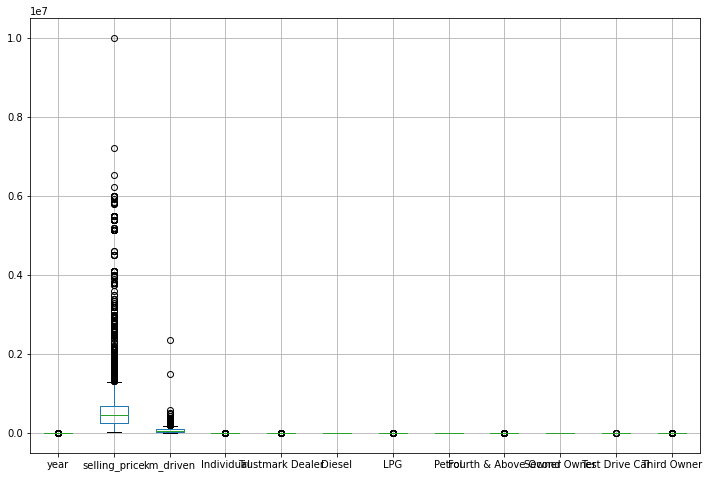

In [12]:
#Creating a box plot for the data
plt.figure(figsize=(12,8))
car.boxplot()
plt.show()

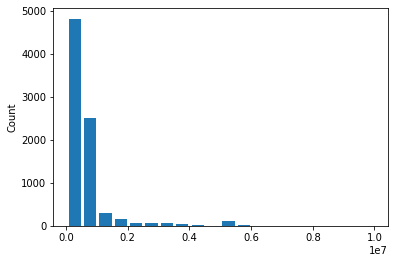

In [13]:
plt.hist(car.selling_price, bins=20, rwidth=0.8)
plt.xlabel('')
plt.ylabel('Count')
plt.show()